<a href="https://colab.research.google.com/github/omarshukurov/energy_consumption/blob/main/Climate_%26_Energy_Consumption_Dataset_2020%E2%80%932024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "global_climate_energy_2020_2024.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "emirhanakku/climate-and-energy-consumption-dataset-20202024",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'climate-and-energy-consumption-dataset-20202024' dataset.
First 5 records:          date  country  avg_temperature  humidity  co2_emission  \
0  2020-01-01  Germany            28.29     31.08        212.63   
1  2020-01-02  Germany            28.38     37.94        606.05   
2  2020-01-03  Germany            28.74     57.67        268.72   
3  2020-01-04  Germany            26.66     51.34        167.32   
4  2020-01-05  Germany            26.81     65.38        393.89   

   energy_consumption  renewable_share  urban_population  \
0            11348.75            14.42             76.39   
1             4166.64             5.63             86.26   
2             4503.80            14.20             75.92   
3             3259.13            13.84             63.15   
4             7023.72             6.93             76.02   

   industrial_activity_index  energy_price  
0                      51.22         83.93  
1                      78.2

In [5]:
print(df.columns)

Index(['date', 'country', 'avg_temperature', 'humidity', 'co2_emission',
       'energy_consumption', 'renewable_share', 'urban_population',
       'industrial_activity_index', 'energy_price'],
      dtype='object')


In [3]:
import pandas as pd

# Group by region and sum the number of cars sold
energy_consumption_per_region = df.groupby('country')['energy_consumption'].sum().reset_index()

# Sort descending for clarity (optional)
energy_consumption_per_region = energy_consumption_per_region.sort_values(by='energy_consumption', ascending=False)

print(energy_consumption_per_region)


           country  energy_consumption
5          Germany         13584697.12
10          Mexico         13529273.68
7        Indonesia         13521911.05
19   United States         13492452.63
6            India         13433439.02
17          Turkey         13413147.55
1           Brazil         13353348.03
3            China         13351267.49
4           France         13340242.95
11     Netherlands         13313246.14
18  United Kingdom         13298224.58
13          Poland         13295508.47
14    South Africa         13293904.91
9            Japan         13265683.82
12          Norway         13258829.08
0        Australia         13227293.65
16          Sweden         13224752.02
2           Canada         13191677.18
8            Italy         13162314.35
15           Spain         13041149.76


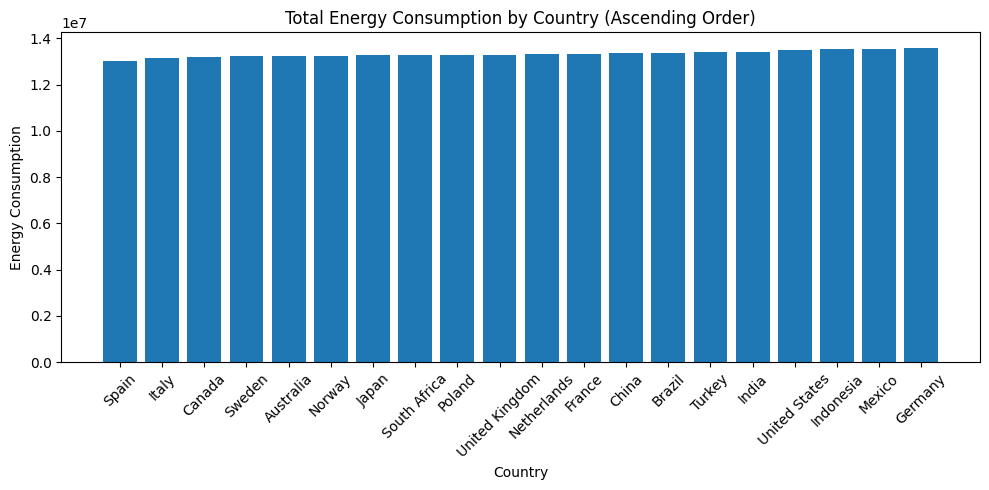

In [4]:
import matplotlib.pyplot as plt

# Group and sort by energy consumption (ascending)
energy_by_country = (
    df.groupby('country')['energy_consumption']
    .sum()
    .reset_index()
    .sort_values(by='energy_consumption', ascending=True)
)

# Create the sorted bar chart
plt.figure(figsize=(10,5))
plt.bar(energy_by_country['country'], energy_by_country['energy_consumption'])
plt.title('Total Energy Consumption by Country (Ascending Order)')
plt.xlabel('Country')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



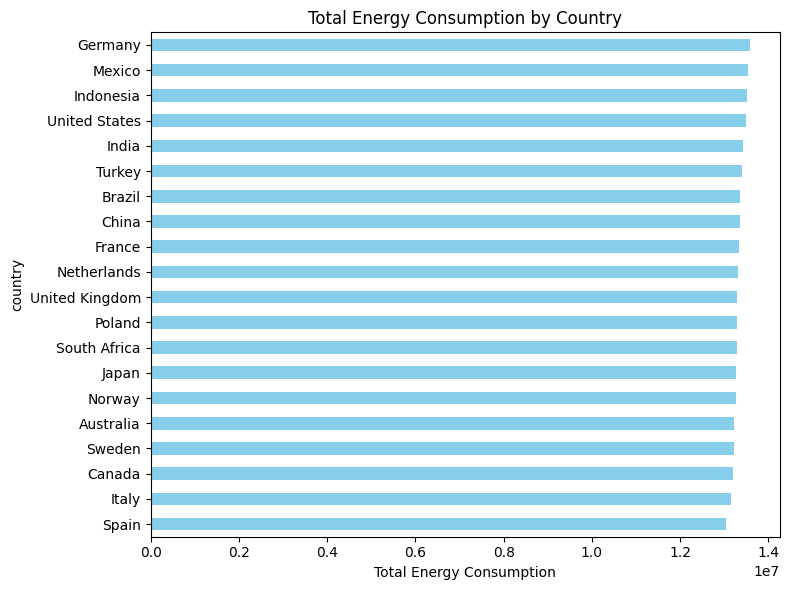

In [5]:
df.groupby('country')['energy_consumption'].sum().sort_values().plot(
    kind='barh', figsize=(8,6), color='skyblue', title='Total Energy Consumption by Country'
)
plt.xlabel('Total Energy Consumption')
plt.tight_layout()
plt.show()


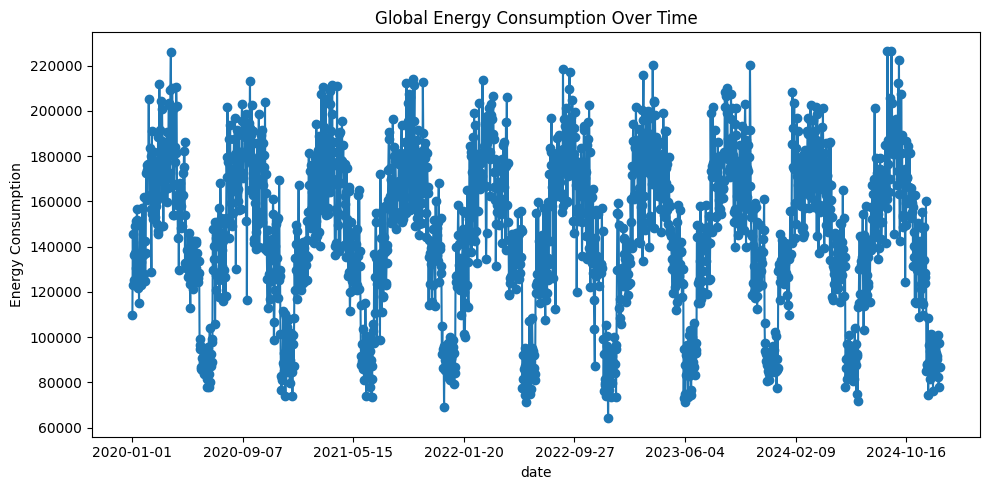

In [6]:
df.groupby('date')['energy_consumption'].sum().plot(
    kind='line', figsize=(10,5), marker='o', title='Global Energy Consumption Over Time'
)
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.show()


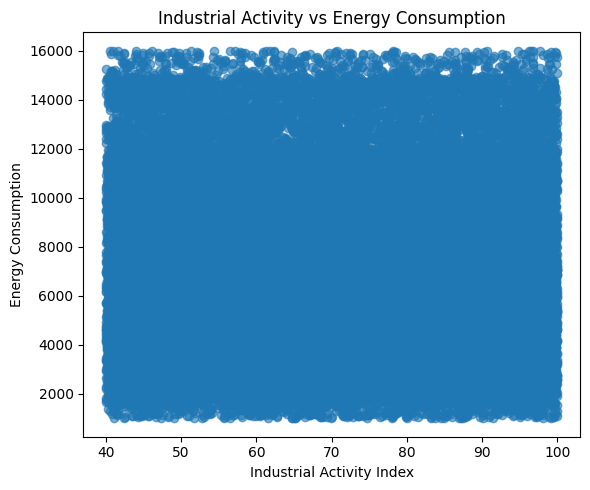

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(df['industrial_activity_index'], df['energy_consumption'], alpha=0.6)
plt.title('Industrial Activity vs Energy Consumption')
plt.xlabel('Industrial Activity Index')
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.show()


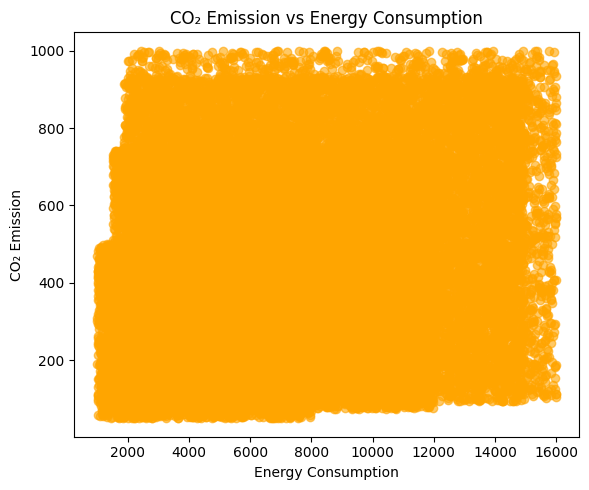

In [8]:
plt.figure(figsize=(6,5))
plt.scatter(df['energy_consumption'], df['co2_emission'], alpha=0.6, color='orange')
plt.title('CO₂ Emission vs Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('CO₂ Emission')
plt.tight_layout()
plt.show()


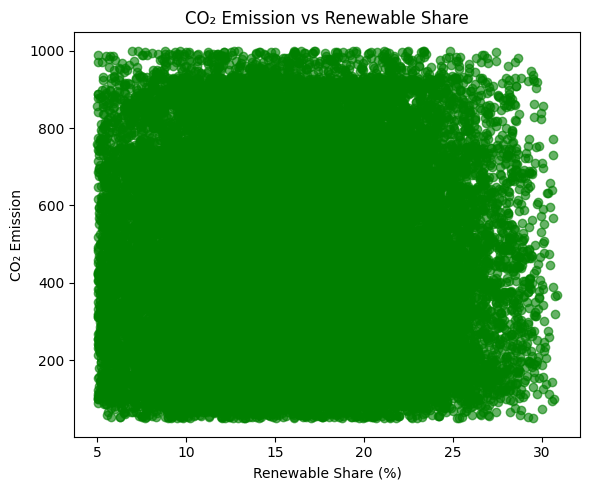

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(df['renewable_share'], df['co2_emission'], alpha=0.6, color='green')
plt.title('CO₂ Emission vs Renewable Share')
plt.xlabel('Renewable Share (%)')
plt.ylabel('CO₂ Emission')
plt.tight_layout()
plt.show()


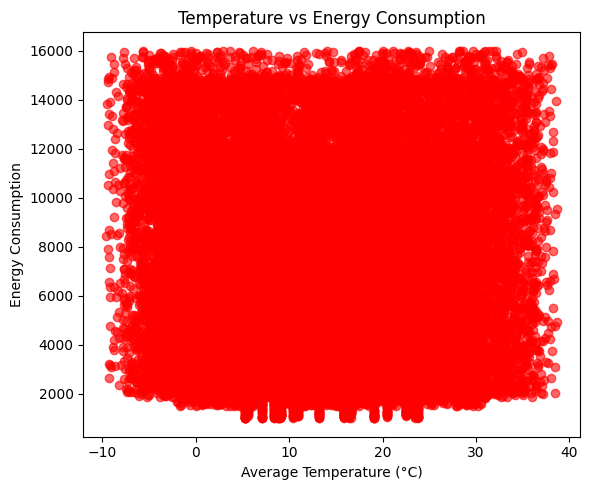

In [10]:
plt.figure(figsize=(6,5))
plt.scatter(df['avg_temperature'], df['energy_consumption'], alpha=0.6, color='red')
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.show()


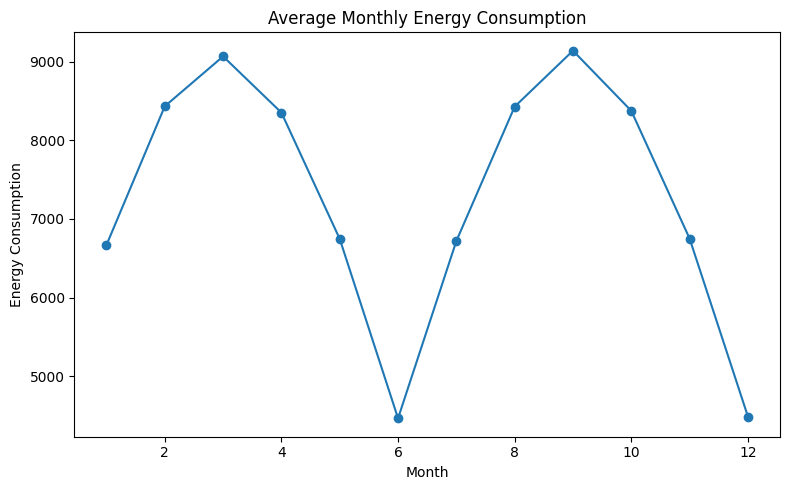

In [11]:
df['month'] = pd.to_datetime(df['date']).dt.month
df.groupby('month')['energy_consumption'].mean().plot(
    kind='line', marker='o', figsize=(8,5), title='Average Monthly Energy Consumption'
)
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.show()


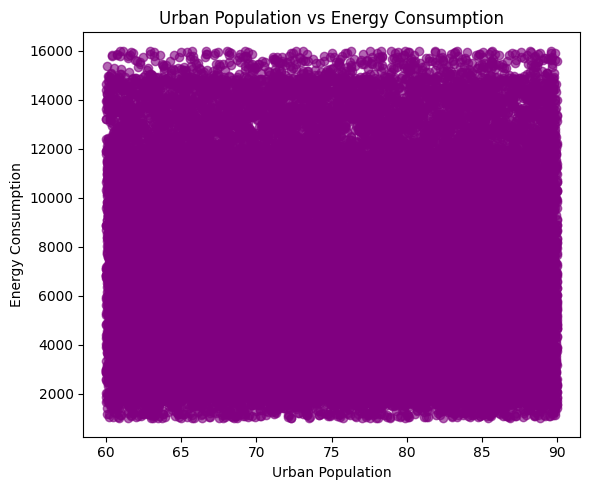

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(df['urban_population'], df['energy_consumption'], alpha=0.6, color='purple')
plt.title('Urban Population vs Energy Consumption')
plt.xlabel('Urban Population')
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.show()


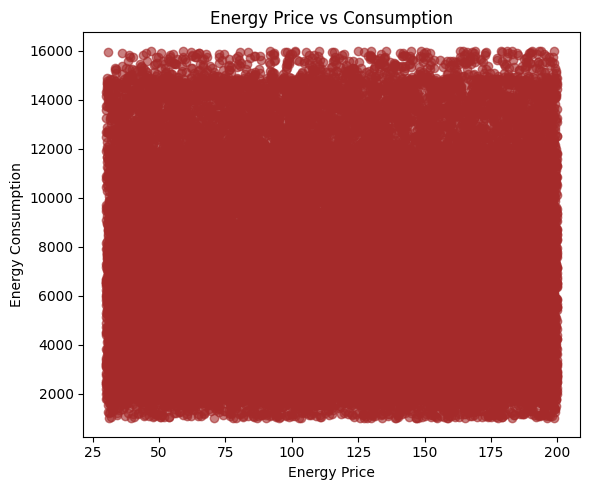

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(df['energy_price'], df['energy_consumption'], alpha=0.6, color='brown')
plt.title('Energy Price vs Consumption')
plt.xlabel('Energy Price')
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.show()


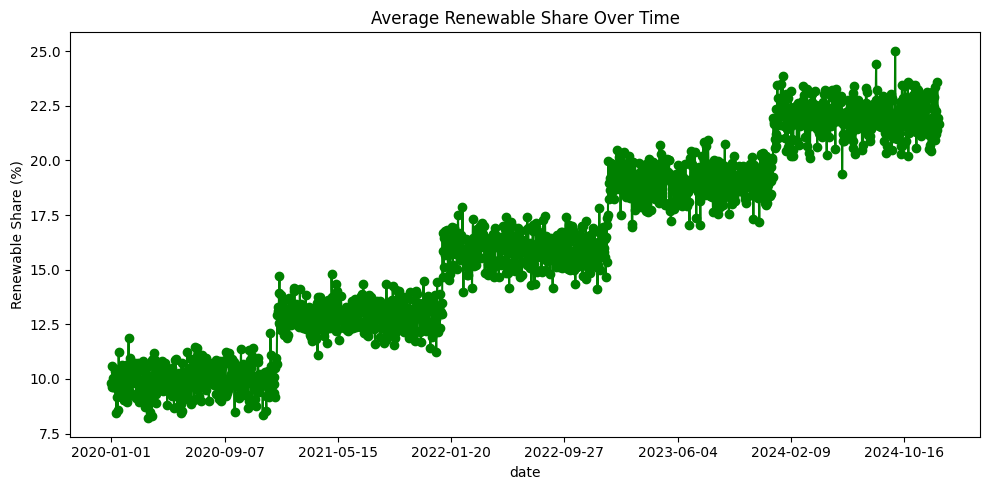

In [14]:
df.groupby('date')['renewable_share'].mean().plot(
    kind='line', figsize=(10,5), marker='o', color='green', title='Average Renewable Share Over Time'
)
plt.ylabel('Renewable Share (%)')
plt.tight_layout()
plt.show()


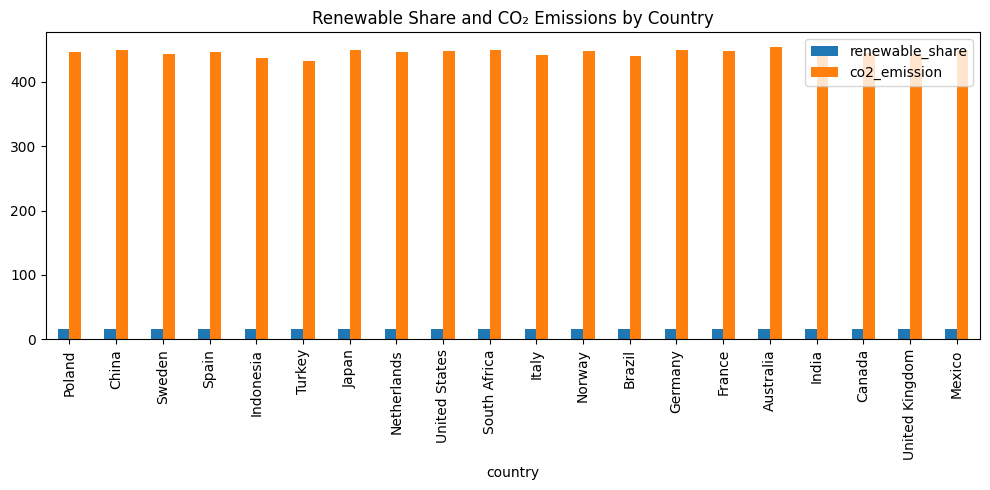

In [15]:
df.groupby('country')[['renewable_share', 'co2_emission']].mean().sort_values(by='renewable_share').plot(
    kind='bar', figsize=(10,5), title='Renewable Share and CO₂ Emissions by Country'
)
plt.tight_layout()
plt.show()


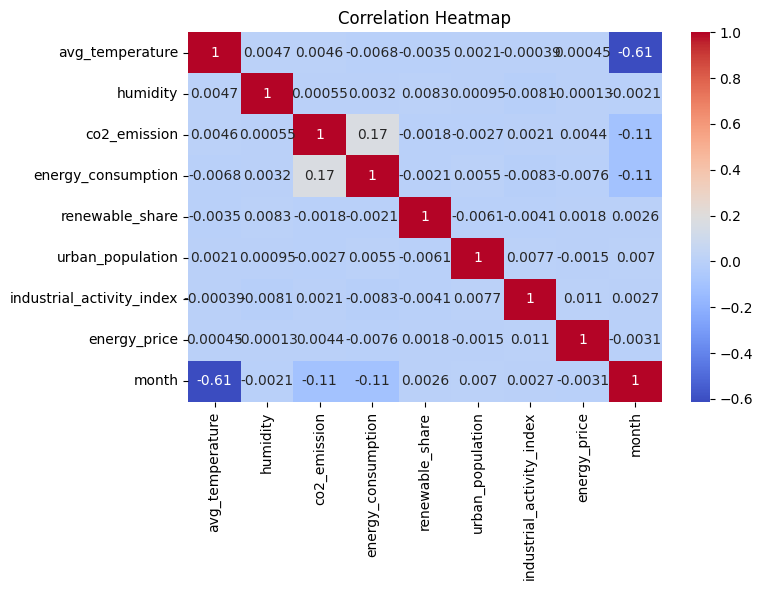

In [16]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
